In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Función para mostrar imágenes en una fila
def show_images(images, titles, cmap="gray"):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [44]:
# 1. Cargar imagen en color
img_color = cv2.imread("../../datos/bogota.jpg")  # Cambia a la ruta de tu imagen si es necesario
img_color = cv2.cvtColor(
    img_color, cv2.COLOR_BGR2RGB
)  # Convertir de BGR a RGB para Matplotlib

In [45]:
# 2. Convertir a escala de grises
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

In [46]:
# 3. Filtro de desenfoque (blur)
blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

In [47]:
# 4. Filtro de realce (sharpening)
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpen = cv2.filter2D(img_gray, -1, kernel_sharpen)

5. Detección de bordes

In [48]:
# Sobel X y Y
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)

In [51]:
# Laplaciano
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)

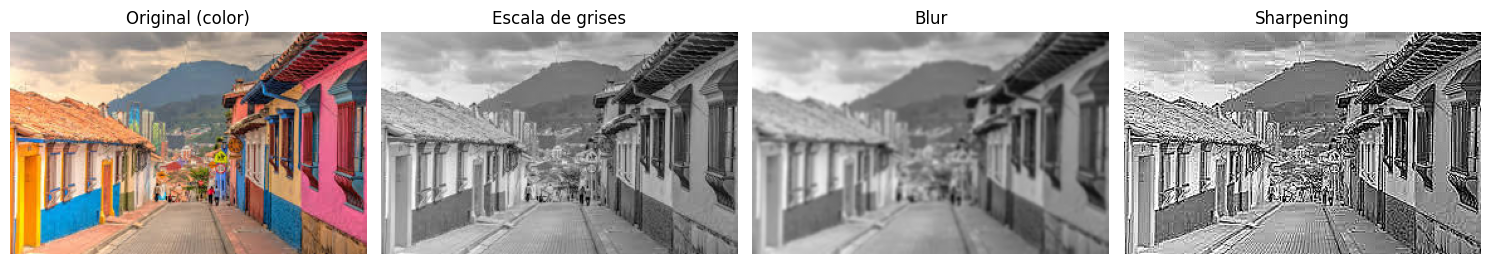

In [52]:
show_images(
    [img_color, img_gray, blur, sharpen],
    ["Original (color)", "Escala de grises", "Blur", "Sharpening"],
    cmap='gray'
)

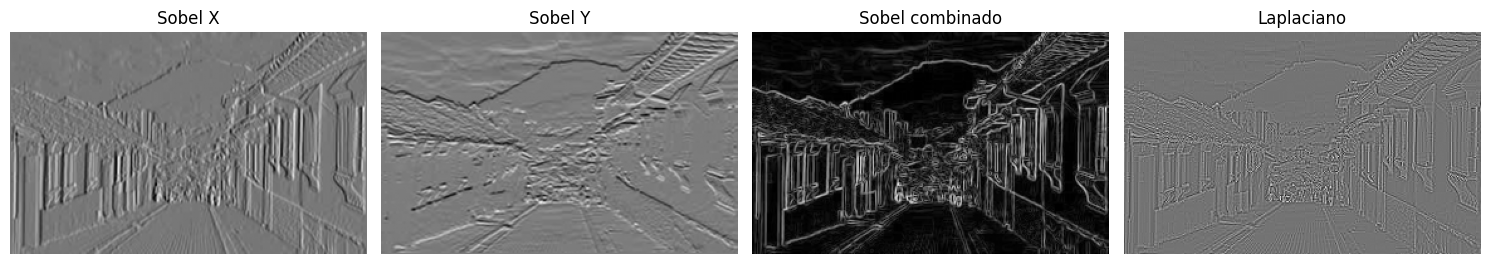

In [53]:
show_images(
    [sobelx, sobely, sobel_combined, laplacian],
    ["Sobel X", "Sobel Y", "Sobel combinado", "Laplaciano"],
    cmap="gray",
)